In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import  LogisticRegressionCV
import seaborn as sns
from sklearn import tree


In [4]:
#!Leia o dataset CSV para um DataFrame
df = pd.read_csv('dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv')
df = df.drop(["status","accident_reference", "accident_index", "accident_year","lsoa_of_casualty"],axis=1)
df
#Exiba as primeiras 5 linhas do dataset


,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9
1,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2
2,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10
3,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10
4,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,1,1,3,2,56,9,3,10,9,0,0,0,0,1,10
61348,1,1,3,1,14,3,2,5,9,0,0,0,0,-1,-1
61349,2,1,1,1,42,7,3,0,0,0,0,0,9,1,5
61350,1,1,1,2,40,7,3,0,0,0,0,0,9,1,3


In [5]:
X = df.drop('casualty_severity',axis=1)
y = df['casualty_severity']

In [6]:
X

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2,1,1,2,46,8,0,0,0,0,0,9,1,9
1,1,1,1,1,30,6,0,0,0,0,0,9,1,2
2,1,1,1,2,58,9,0,0,0,0,0,9,1,10
3,2,3,1,2,78,11,0,0,0,0,0,9,2,10
4,3,2,1,1,63,9,0,0,0,0,0,9,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,1,1,3,2,56,9,10,9,0,0,0,0,1,10
61348,1,1,3,1,14,3,5,9,0,0,0,0,-1,-1
61349,2,1,1,1,42,7,0,0,0,0,0,9,1,5
61350,1,1,1,2,40,7,0,0,0,0,0,9,1,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   vehicle_reference                   61352 non-null  int64
 1   casualty_reference                  61352 non-null  int64
 2   casualty_class                      61352 non-null  int64
 3   sex_of_casualty                     61352 non-null  int64
 4   age_of_casualty                     61352 non-null  int64
 5   age_band_of_casualty                61352 non-null  int64
 6   casualty_severity                   61352 non-null  int64
 7   pedestrian_location                 61352 non-null  int64
 8   pedestrian_movement                 61352 non-null  int64
 9   car_passenger                       61352 non-null  int64
 10  bus_or_coach_passenger              61352 non-null  int64
 11  pedestrian_road_maintenance_worker  61352 non-null  int64
 12  casu

In [8]:
df.describe()

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000
mean,1.450368,1.333779,1.482299,1.368790,36.670312,6.288157,2.783039,0.800316,0.645325,0.222047,0.048507,0.032860,9.475160,1.091032,4.337674
std,1.109855,0.981507,0.735614,0.534536,19.574357,2.463082,0.442318,2.197167,2.009611,0.615127,0.426419,0.261327,16.662727,0.903365,3.158496
min,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,227.000000,148.000000,3.000000,9.000000,101.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


In [9]:
scaler = StandardScaler()
scaler.fit(df.drop('casualty_severity', axis=1))
df_normalizado = scaler.transform(df.drop('casualty_severity', axis=1))
df_normalizado

array([[ 0.49523219, -0.34007043, -0.65564622, ..., -0.02851656,
        -0.10077083,  1.47613423],
       [-0.40579344, -0.34007043, -0.65564622, ..., -0.02851656,
        -0.10077083, -0.74012875],
       [-0.40579344, -0.34007043, -0.65564622, ..., -0.02851656,
        -0.10077083,  1.79274323],
       ...,
       [ 0.49523219, -0.34007043, -0.65564622, ..., -0.02851656,
        -0.10077083,  0.20969824],
       [-0.40579344, -0.34007043, -0.65564622, ..., -0.02851656,
        -0.10077083, -0.42351975],
       [ 0.49523219, -0.34007043, -0.65564622, ..., -0.02851656,
        -0.10077083, -0.74012875]])

In [10]:
df_param = pd.DataFrame(df_normalizado, columns=df.drop('casualty_severity', axis=1).columns)
df_param

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,0.495232,-0.340070,-0.655646,1.180865,0.476632,0.695006,-0.364252,-0.321122,-0.36098,-0.113755,-0.125742,-0.028517,-0.100771,1.476134
1,-0.405793,-0.340070,-0.655646,-0.689931,-0.340771,-0.116991,-0.364252,-0.321122,-0.36098,-0.113755,-0.125742,-0.028517,-0.100771,-0.740129
2,-0.405793,-0.340070,-0.655646,1.180865,1.089684,1.101005,-0.364252,-0.321122,-0.36098,-0.113755,-0.125742,-0.028517,-0.100771,1.792743
3,0.495232,1.697629,-0.655646,1.180865,2.111437,1.913002,-0.364252,-0.321122,-0.36098,-0.113755,-0.125742,-0.028517,1.006211,1.792743
4,1.396258,0.678779,-0.655646,-0.689931,1.345122,1.101005,-0.364252,-0.321122,-0.36098,-0.113755,-0.125742,-0.028517,2.113192,0.842916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,-0.405793,-0.340070,2.063192,1.180865,0.987509,1.101005,4.187100,4.157393,-0.36098,-0.113755,-0.125742,-0.568649,-0.100771,1.792743
61348,-0.405793,-0.340070,2.063192,-0.689931,-1.158173,-1.334987,1.911424,4.157393,-0.36098,-0.113755,-0.125742,-0.568649,-2.314734,-1.689956
61349,0.495232,-0.340070,-0.655646,-0.689931,0.272281,0.289007,-0.364252,-0.321122,-0.36098,-0.113755,-0.125742,-0.028517,-0.100771,0.209698
61350,-0.405793,-0.340070,-0.655646,1.180865,0.170106,0.289007,-0.364252,-0.321122,-0.36098,-0.113755,-0.125742,-0.028517,-0.100771,-0.423520


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_param, y, test_size=0.33, random_state=42)

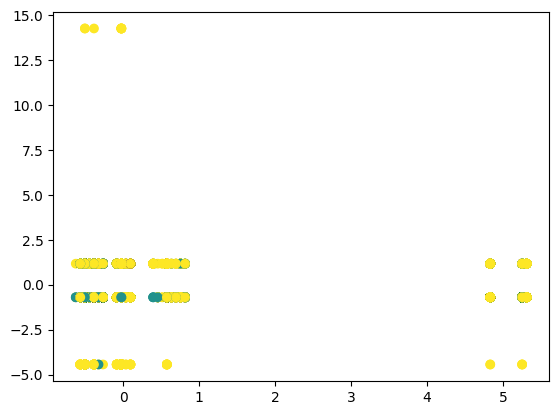

In [12]:
fig, ax = plt.subplots()

ax.scatter(X_train["casualty_type"], X_train['sex_of_casualty'], c=y_train)

plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

In [16]:
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       0.02      0.02      0.02       268
           2       0.25      0.25      0.25      3874
           3       0.81      0.82      0.81     16105

    accuracy                           0.70     20247
   macro avg       0.36      0.36      0.36     20247
weighted avg       0.69      0.70      0.70     20247



[[    6    69   193]
 [   69   958  2847]
 [  178  2786 13141]]


In [17]:
erro_rate = []


for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred = knn.predict(X_test)
        erro_rate.append(np.mean(pred!=y_test))



In [18]:
print(knn.score(X_test, y_test))
print(knn.score(X_train, y_train))

0.795031362671013
0.7964967765478652


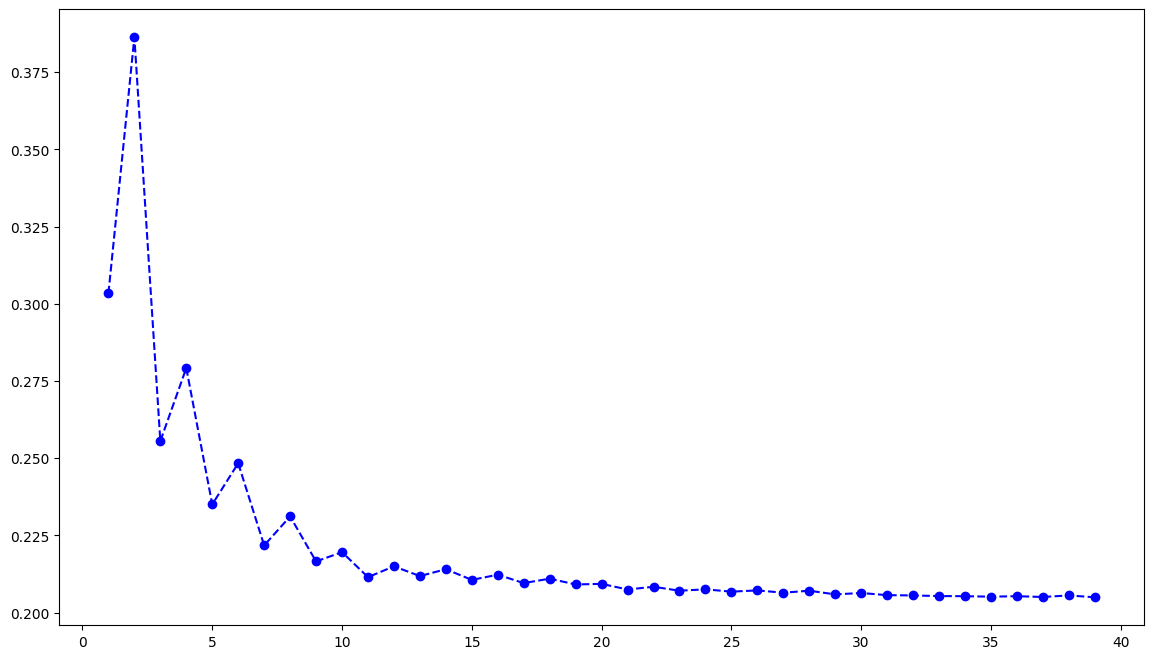

In [19]:
plt.figure(figsize = (14,8))
plt.plot(range (1,40), erro_rate,color = 'blue', linestyle = 'dashed', marker = 'o')

In [20]:

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)


<Axes: >

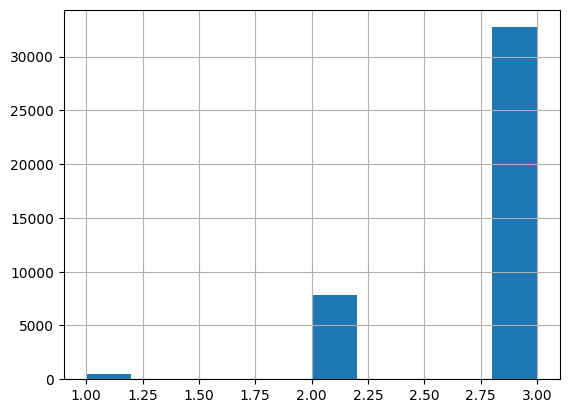

In [21]:
y_train.hist()

<Axes: ylabel='count'>

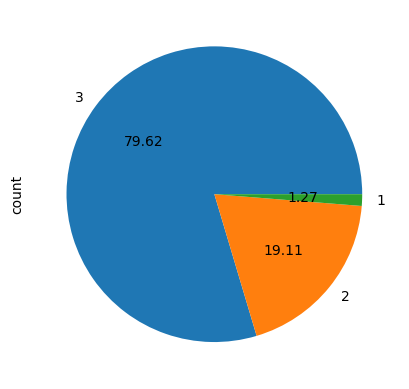

In [22]:
y_train.value_counts().plot.pie(autopct = '%.2f')

In [23]:
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       268
           2       0.41      0.04      0.07      3874
           3       0.80      0.99      0.88     16105

    accuracy                           0.79     20247
   macro avg       0.40      0.34      0.32     20247
weighted avg       0.72      0.79      0.72     20247



[[    0     6   262]
 [    0   155  3719]
 [    0   214 15891]]
0.7925124709833555


c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
y_train.value_counts()

casualty_severity
3    32726
2     7857
1      522
Name: count, dtype: int64

In [25]:
D_train, D_test, j_train, j_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
red = LogisticRegression(random_state=0,max_iter=5000000000)

In [28]:
red = red.fit(D_train,j_train)

In [29]:
j_pred = red.predict(D_test)

In [30]:
accuracy_score(j_test,j_pred)
confusion_matrix(j_test,j_pred)


array([[    0,     0,   261],
       [    0,     0,  3871],
       [    1,     0, 16114]], dtype=int64)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clfAD = DecisionTreeClassifier(random_state= 0)
clfAD = clfAD.fit(D_train,j_train)

In [33]:
r_pred = clfAD.predict(D_test)

In [34]:
confusion_matrix(j_test,r_pred)

array([[    7,    68,   186],
       [   83,  1028,  2760],
       [  193,  2944, 12978]], dtype=int64)

In [35]:
j_train.value_counts()

casualty_severity
3    32716
2     7860
1      529
Name: count, dtype: int64

In [36]:
!pip install -U imbalanced-learn

In [37]:
from imblearn.under_sampling import RandomUnderSampler

In [38]:
rus = RandomUnderSampler(random_state = 42)

In [39]:
X_res, y_res = rus.fit_resample(D_train,j_train)

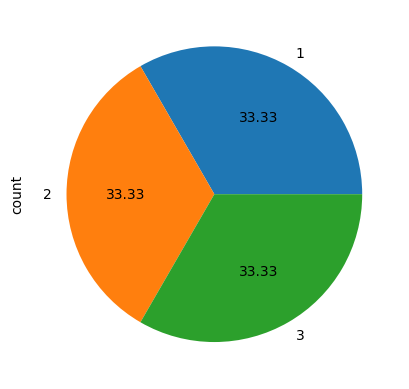

In [40]:
y_res.value_counts().plot.pie(autopct ='%.2f');


In [41]:
D_train, D_test, j_train, j_test = train_test_split(X_res, y_res, test_size=0.39, random_state=42)

In [42]:
y_res.value_counts()

casualty_severity
1    529
2    529
3    529
Name: count, dtype: int64

In [43]:
red2 = LogisticRegression(random_state=0,max_iter=5000)
red2 = red2.fit(D_train,j_train)
j_pred2 = red2.predict(D_test)
confusion_matrix(j_test,j_pred2)

array([[115,  57,  40],
       [ 82,  54,  68],
       [ 59,  46,  98]], dtype=int64)

In [44]:
accuracy_score(j_test,j_pred2)


0.43134087237479807

In [45]:
print(classification_report(j_test,j_pred2))
print("\n")
print(confusion_matrix(j_test,j_pred2))
print(accuracj_score(j_test,j_pred2))


              precision    recall  f1-score   support

           1       0.45      0.54      0.49       212
           2       0.34      0.26      0.30       204
           3       0.48      0.48      0.48       203

    accuracy                           0.43       619
   macro avg       0.42      0.43      0.42       619
weighted avg       0.42      0.43      0.42       619



[[115  57  40]
 [ 82  54  68]
 [ 59  46  98]]


NameError: name 'accuracj_score' is not defined